In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys
import warnings
%matplotlib inline

In [15]:
balls = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IPL_Ball_by_Ball_2022.csv")
matches = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IPL_Matches_2022.csv")

In [16]:
balls.isnull().sum()
print("balls Shape:",balls.shape)
matches.isnull().sum()
print("matches Shape:",matches.shape)

balls Shape: (17912, 17)
matches Shape: (74, 20)


In [17]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17912 non-null  int64 
 1   innings            17912 non-null  int64 
 2   overs              17912 non-null  int64 
 3   ballnumber         17912 non-null  int64 
 4   batter             17912 non-null  object
 5   bowler             17912 non-null  object
 6   non-striker        17912 non-null  object
 7   extra_type         1050 non-null   object
 8   batsman_run        17912 non-null  int64 
 9   extras_run         17912 non-null  int64 
 10  total_run          17912 non-null  int64 
 11  non_boundary       17912 non-null  int64 
 12  isWicketDelivery   17912 non-null  int64 
 13  player_out         912 non-null    object
 14  kind               912 non-null    object
 15  fielders_involved  704 non-null    object
 16  BattingTeam        17912 non-null  objec

In [18]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               74 non-null     int64  
 1   City             74 non-null     object 
 2   Date             74 non-null     object 
 3   Season           74 non-null     int64  
 4   MatchNumber      74 non-null     object 
 5   Team1            74 non-null     object 
 6   Team2            74 non-null     object 
 7   Venue            74 non-null     object 
 8   TossWinner       74 non-null     object 
 9   TossDecision     74 non-null     object 
 10  SuperOver        74 non-null     object 
 11  WinningTeam      74 non-null     object 
 12  WonBy            74 non-null     object 
 13  Margin           74 non-null     int64  
 14  method           0 non-null      float64
 15  Player_of_Match  74 non-null     object 
 16  Team1Players     74 non-null     object 
 17  Team2Players     7

In [19]:
balls.head(10)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [20]:
balls.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,1.791200e+04,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000,17912.000000
mean,1.304524e+06,1.485317,9.290085,3.652077,1.286958,0.074978,1.361936,0.000167,0.050916
std,1.843446e+03,0.499798,5.690914,1.837818,1.701842,0.372878,1.688991,0.012941,0.219831
min,1.304047e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304065e+06,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.304084e+06,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.304102e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.312200e+06,2.000000,19.000000,10.000000,6.000000,5.000000,7.000000,1.000000,1.000000


In [21]:
matches.describe()

,ID,Season,Margin,method
count,7.400000e+01,74.0,74.000000,0.0
mean,1.304520e+06,2022.0,16.972973,NaN
std,1.848086e+03,0.0,19.651047,NaN
min,1.304047e+06,2022.0,2.000000,NaN
25%,1.304065e+06,2022.0,5.250000,NaN
50%,1.304084e+06,2022.0,8.000000,NaN
75%,1.304102e+06,2022.0,18.000000,NaN
max,1.312200e+06,2022.0,91.000000,NaN


In [22]:
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


In [23]:
print("Matches played at :", matches["City"].unique())
print("\n Teams Participated :", matches["Team1"].unique())
print("\n Matches played so far: ",matches.shape[0])

Matches played at : ['Ahmedabad' 'Kolkata' 'Mumbai' 'Navi Mumbai' 'Pune']

 Teams Participated : ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians']

 Matches played so far:  74


In [24]:
matches['Season']=pd.DatetimeIndex(matches["Date"]).year
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [25]:
matches_per_season=matches.groupby(["Season"])["ID"].count().reset_index().rename(columns={"ID":"Matches"})
print(matches_per_season)

   Season  Matches
0    2022       74


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


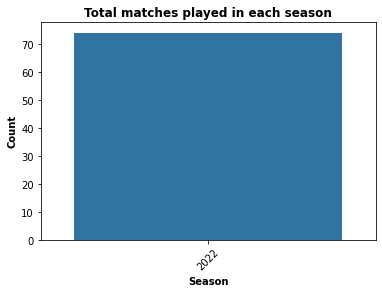

In [26]:
sns.countplot(matches["Season"])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Total matches played in each season", fontsize=12,fontweight="bold")
plt.show()

In [27]:
winning_team=matches.groupby(["WinningTeam"])["ID"].count().reset_index().rename(columns={"ID":"Matches Won"})
print(winning_team)

                   WinningTeam  Matches Won
0          Chennai Super Kings            4
1               Delhi Capitals            7
2               Gujarat Titans           12
3        Kolkata Knight Riders            6
4         Lucknow Super Giants            9
5               Mumbai Indians            4
6                 Punjab Kings            7
7             Rajasthan Royals           10
8  Royal Challengers Bangalore            9
9          Sunrisers Hyderabad            6


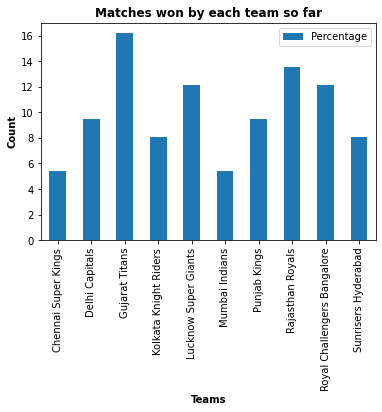

In [28]:
winning_team["Percentage"]=((winning_team["Matches Won"]/winning_team["Matches Won"].sum())*100).sort_values()
winning_team.plot(x="WinningTeam",y="Percentage",kind='bar')
plt.xlabel("Teams", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Matches won by each team so far", fontsize=12,fontweight="bold")
plt.show()

Which venue results in a win for Batting first team and vice versa?

In [29]:
venue=matches[["Venue","Team1","Team2","TossWinner","TossDecision","WinningTeam"]]
venue["TossLosser"]=matches["Team1"]
venue.loc[venue["TossWinner"]!=venue["Team1"],"TossLosser"]=venue["Team1"]
venue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,TossLosser
0,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,Rajasthan Royals
1,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore
3,"Eden Gardens, Kolkata",Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,Rajasthan Royals
4,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad
...,...,...,...,...,...,...,...
69,"Maharashtra Cricket Association Stadium, Pune",Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Rajasthan Royals,Rajasthan Royals
70,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,Lucknow Super Giants
71,"Dr DY Patil Sports Academy, Mumbai",Royal Challengers Bangalore,Punjab Kings,Punjab Kings,field,Punjab Kings,Royal Challengers Bangalore
72,"Brabourne Stadium, Mumbai",Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,Mumbai Indians


In [31]:
venue.loc[venue["TossDecision"]=="bat","BattingTeam"]=venue["TossWinner"]
venue.loc[venue["TossDecision"]=="field","BattingTeam"]=venue["TossLosser"]
venue=venue.drop(columns=["Team1","Team2","TossDecision","TossWinner","TossLosser"])
venue.loc[venue["WinningTeam"]==venue["BattingTeam"],"BattingWin"]=1
venue.loc[venue["WinningTeam"]!=venue["BattingTeam"],"BattingWin"]=0
venue

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Venue,WinningTeam,BattingTeam,BattingWin
0,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,0.0
1,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Royal Challengers Bangalore,0.0
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Royal Challengers Bangalore,1.0
3,"Eden Gardens, Kolkata",Gujarat Titans,Rajasthan Royals,0.0
4,"Wankhede Stadium, Mumbai",Punjab Kings,Sunrisers Hyderabad,0.0
...,...,...,...,...
69,"Maharashtra Cricket Association Stadium, Pune",Rajasthan Royals,Rajasthan Royals,1.0
70,"Wankhede Stadium, Mumbai",Gujarat Titans,Lucknow Super Giants,0.0
71,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,Royal Challengers Bangalore,0.0
72,"Brabourne Stadium, Mumbai",Delhi Capitals,Mumbai Indians,0.0


In [32]:
batting_win=venue[venue["BattingWin"]==1]
batting_win=batting_win.drop(columns=["BattingWin"])
batting_losses=venue[venue["BattingWin"]==0]
batting_losses=batting_losses.drop(columns=["BattingWin"])
batting_win

,Venue,WinningTeam,BattingTeam
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Royal Challengers Bangalore
8,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,Lucknow Super Giants
9,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Sunrisers Hyderabad
10,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,Delhi Capitals
11,"Brabourne Stadium, Mumbai",Rajasthan Royals,Rajasthan Royals
13,"Maharashtra Cricket Association Stadium, Pune",Kolkata Knight Riders,Kolkata Knight Riders
14,"Brabourne Stadium, Mumbai",Punjab Kings,Punjab Kings
17,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,Gujarat Titans
18,"Dr DY Patil Sports Academy, Mumbai",Kolkata Knight Riders,Kolkata Knight Riders
19,"Dr DY Patil Sports Academy, Mumbai",Chennai Super Kings,Chennai Super Kings


In [33]:
x=batting_win.groupby("Venue")["Venue"].count()
y=batting_losses.groupby("Venue")["Venue"].count()

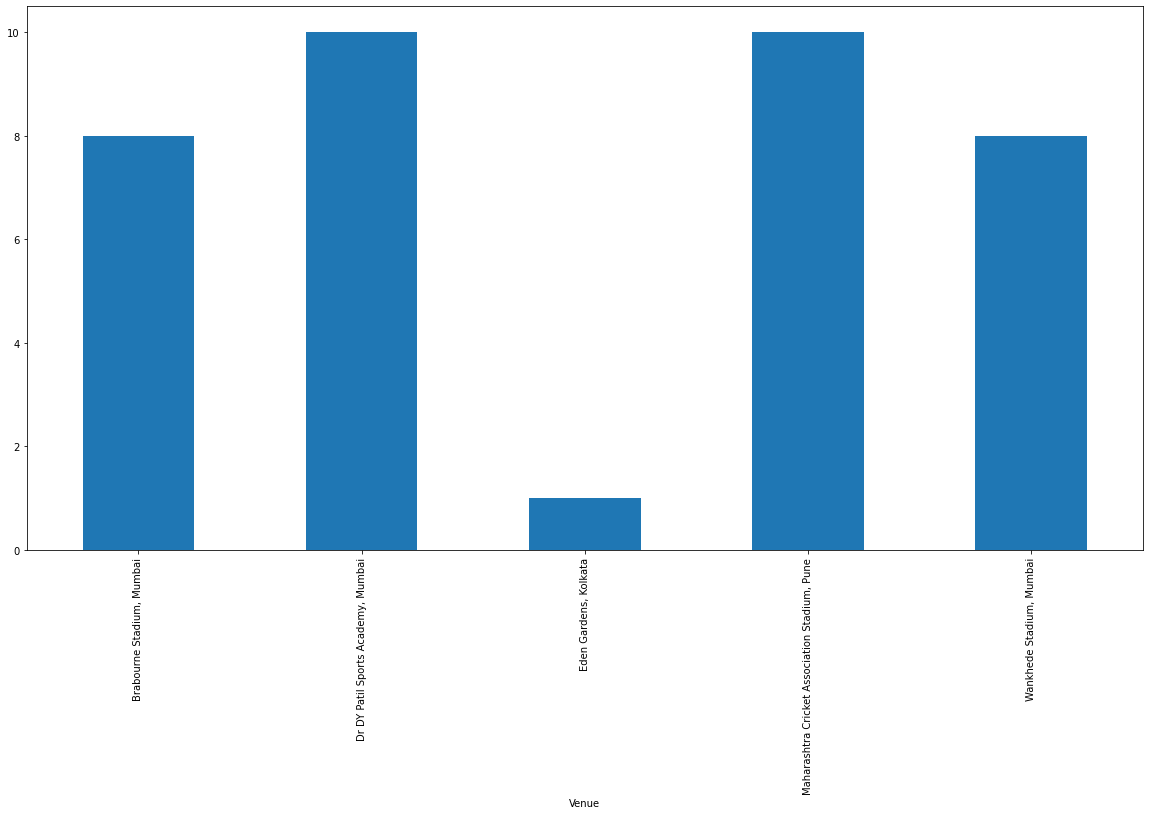

In [34]:
plt.figure(figsize=(20,10))
batting_win.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [35]:
matches.Venue[matches.WonBy != "Wickets"].mode()

0               Dr DY Patil Sports Academy, Mumbai
1    Maharashtra Cricket Association Stadium, Pune
dtype: object

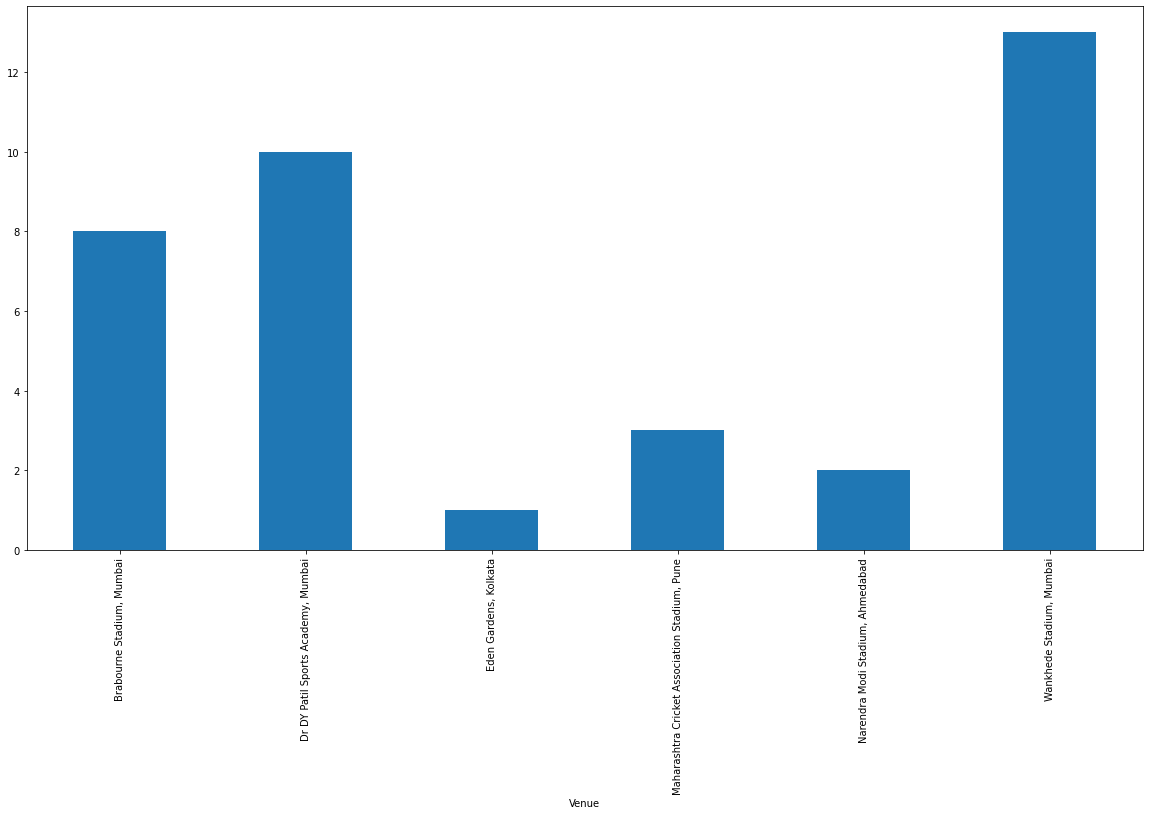

In [36]:
plt.figure(figsize=(20,10))
batting_losses.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [37]:
matches.Venue[matches.WonBy != "Runs"].mode()

0    Wankhede Stadium, Mumbai
dtype: object

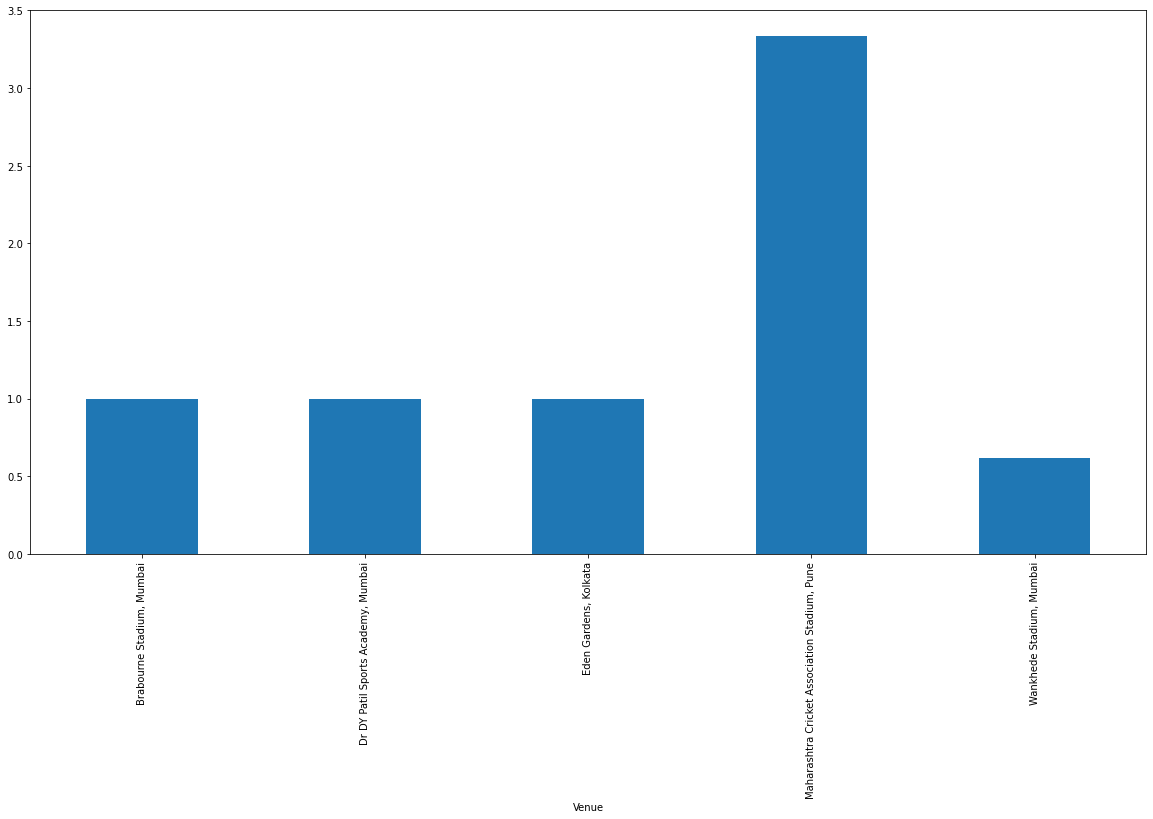

In [38]:
z=x/y
z=z.dropna()
plt.figure(figsize=(20,10))
z.plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [39]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [40]:
player=matches[["Team1","Team2","Player_of_Match","Team1Players","Team2Players"]]
player

,Team1,Team2,Player_of_Match,Team1Players,Team2Players
0,Rajasthan Royals,Gujarat Titans,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,Royal Challengers Bangalore,Rajasthan Royals,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
2,Royal Challengers Bangalore,Lucknow Super Giants,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
3,Rajasthan Royals,Gujarat Titans,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
4,Sunrisers Hyderabad,Punjab Kings,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',..."
...,...,...,...,...,...
69,Rajasthan Royals,Sunrisers Hyderabad,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa..."
70,Lucknow Super Giants,Gujarat Titans,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P..."
71,Royal Challengers Bangalore,Punjab Kings,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L..."
72,Mumbai Indians,Delhi Capitals,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR..."


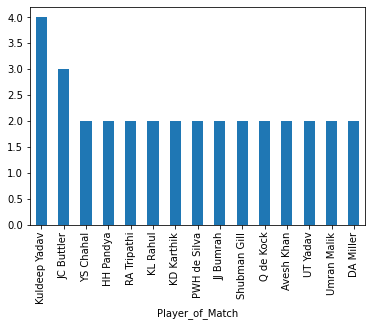

In [41]:
player_of_match=player.groupby("Player_of_Match")["Player_of_Match"].count().sort_values(ascending=False)
player_of_match[:15].plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

In [42]:
season_data=matches[["ID","Season"]].merge(balls,left_on="ID",right_on="ID", how="left").drop("ID", axis=1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


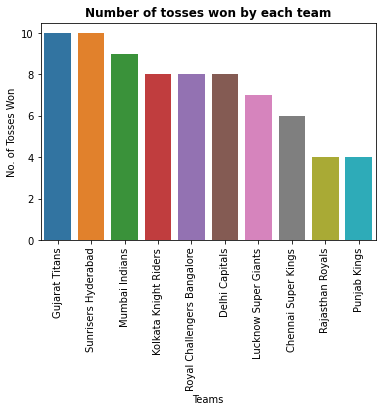

In [44]:
toss=matches["TossWinner"].value_counts()
sns.barplot(x=toss.index,y=toss)
plt.title("Number of tosses won by each team",fontsize=12,fontweight="bold")
plt.xlabel("Teams")
plt.ylabel("No. of Tosses Won")
plt.xticks(rotation='vertical')
plt.show()

In [45]:
matches["WonBy"].value_counts()

Wickets    37
Runs       37
Name: WonBy, dtype: int64

In [48]:
toss=(matches["TossWinner"]==matches["WinningTeam"])
toss.mode()

0    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


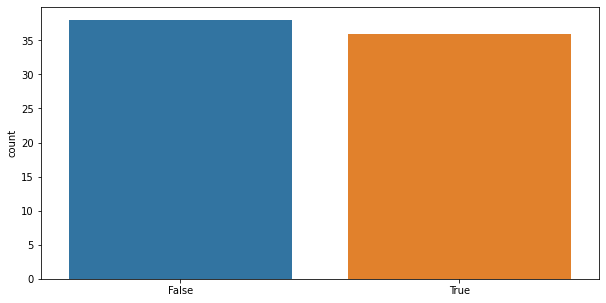

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


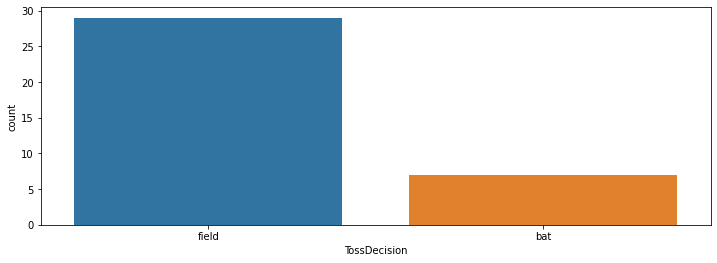

In [50]:
plt.figure(figsize=(12,4))
sns.countplot(matches.TossDecision[matches.TossWinner==matches.WinningTeam])
plt.show()

In [54]:
Player=(balls['batter']=='KL Rahul')
#Player2=(balls['bowler']=='SK rahul')

df_rahul=balls[Player]
#df_rahul.append(balls[Player2])
df_rahul.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
598,1312198,2,0,4,KL Rahul,Mohammed Siraj,Q de Kock,NaN,1,0,1,0,0,NaN,NaN,NaN,Lucknow Super Giants
601,1312198,2,1,1,KL Rahul,JR Hazlewood,M Vohra,NaN,0,0,0,0,0,NaN,NaN,NaN,Lucknow Super Giants
602,1312198,2,1,2,KL Rahul,JR Hazlewood,M Vohra,NaN,3,0,3,0,0,NaN,NaN,NaN,Lucknow Super Giants
604,1312198,2,1,4,KL Rahul,JR Hazlewood,M Vohra,NaN,0,0,0,0,0,NaN,NaN,NaN,Lucknow Super Giants
605,1312198,2,1,5,KL Rahul,JR Hazlewood,M Vohra,NaN,1,0,1,0,0,NaN,NaN,NaN,Lucknow Super Giants


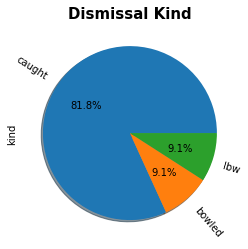

In [55]:
df_rahul['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontsize=15,fontweight="bold")
plt.show()


In [59]:
def count(df_rahul,runs):
    return len(df_rahul['batsman_run']==runs)*runs
print("Runs scored for 1's : ", count(df_rahul,1))
print("Runs scored for 2's : ", count(df_rahul,2))
print("Runs scored for 3's : ", count(df_rahul,3))
print("Runs scored for 4's : ", count(df_rahul,4))
print("Runs scored for 6's : ", count(df_rahul,6))

Runs scored for 1's :  472
Runs scored for 2's :  944
Runs scored for 3's :  1416
Runs scored for 4's :  1888
Runs scored for 6's :  2832


In [60]:
runs=balls.groupby(["batter"])["batsman_run"].sum().sort_values(ascending=False).reset_index()
runs.columns=["Batsman","Runs"]
y=runs.head(10)
y

,Batsman,Runs
0,JC Buttler,863
1,KL Rahul,616
2,Q de Kock,508
3,HH Pandya,487
4,Shubman Gill,483
5,DA Miller,481
6,F du Plessis,468
7,S Dhawan,460
8,SV Samson,458
9,DJ Hooda,451


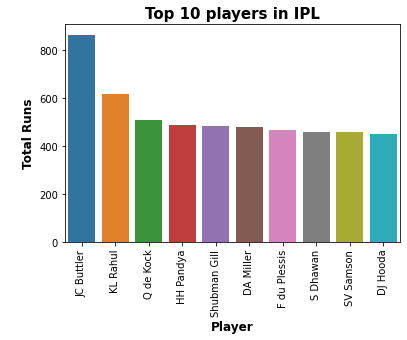

In [61]:
sns.barplot(x=y["Batsman"],y=y["Runs"])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Player',fontsize=12,fontweight="bold")
plt.ylabel('\nTotal Runs',fontsize=12,fontweight="bold")
plt.title("Top 10 players in IPL", fontsize=15, fontweight="bold")
plt.show()